In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('CL_megafon_Cup IT_2020_final_data.csv', sep=';')
df['time_start'] = pd.to_datetime(df['time_start'])
df['time_end'] = pd.to_datetime(df['time_end'])
df = df.sort_values(['place_latitude', 'place_longitude', 'time_start'])

In [68]:
tdf = df.copy()

In [69]:
tdf['hour'] = tdf['time_start'].dt.hour
tdf['dayofweek'] = tdf['time_start'].dt.dayofweek
tdf['weekofyear'] = tdf['time_start'].dt.weekofyear
tdf['quarter'] = tdf['time_start'].dt.quarter
tdf['target'] = (tdf['time_end']-tdf['time_start']).dt.seconds

In [70]:
stations = np.unique(tdf[['place_latitude', 'place_longitude']].values, axis=0)

In [71]:
sc1 = StandardScaler()
sc2 = StandardScaler()
sc1.fit(tdf[['place_latitude','place_longitude']])
sc2.fit(stations)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [72]:
sc1.mean_, sc2.mean_

(array([ 28.84044216, 114.19311394]), array([ 28.7481222 , 114.41004178]))

In [73]:
tdf[['place_latitude','place_longitude']] = sc2.transform(tdf[['place_latitude','place_longitude']])

In [74]:
coords = tdf[['place_latitude','place_longitude']].values

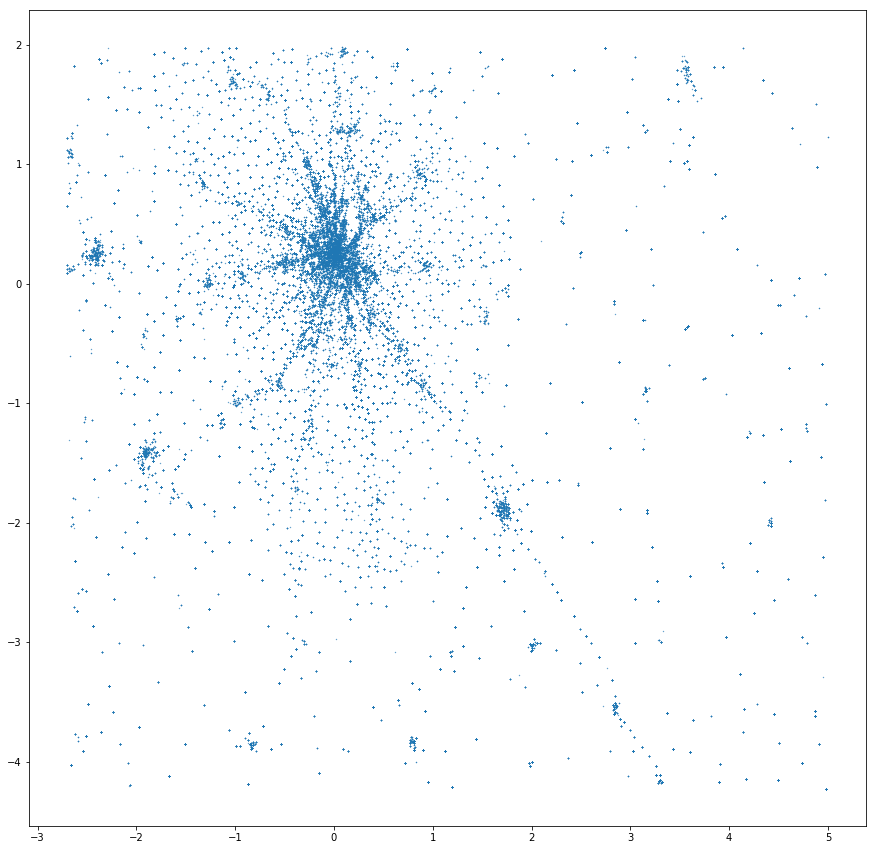

In [75]:
plt.figure(figsize=(15,15))
plt.scatter(*coords.T, s=0.1)
plt.show()

<Figure size 1080x1080 with 0 Axes>

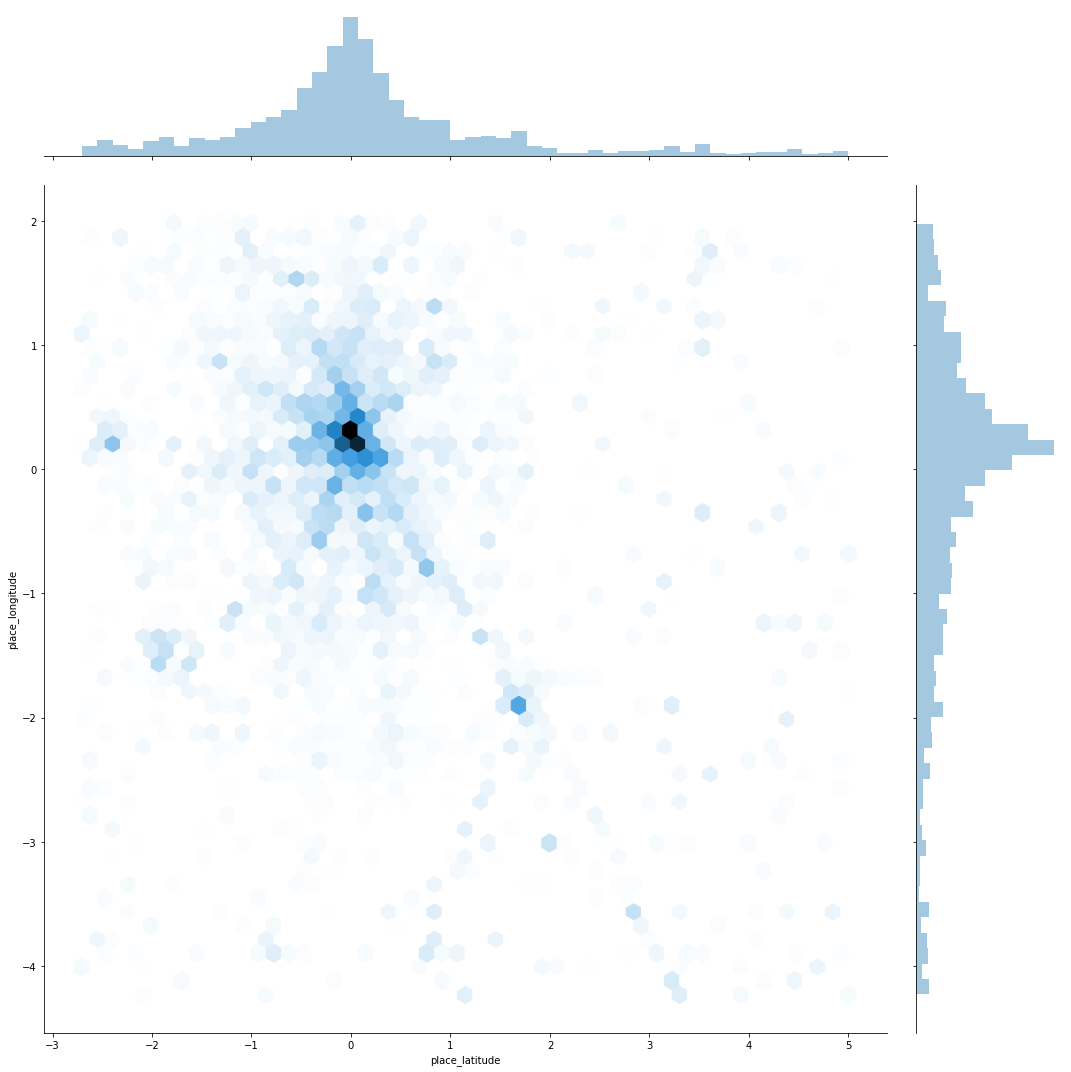

In [91]:
plt.figure(figsize=(15,15))
sns.jointplot('place_latitude','place_longitude', 
              data=tdf, kind="hex", height=15)


In [93]:
sns.jointplot?

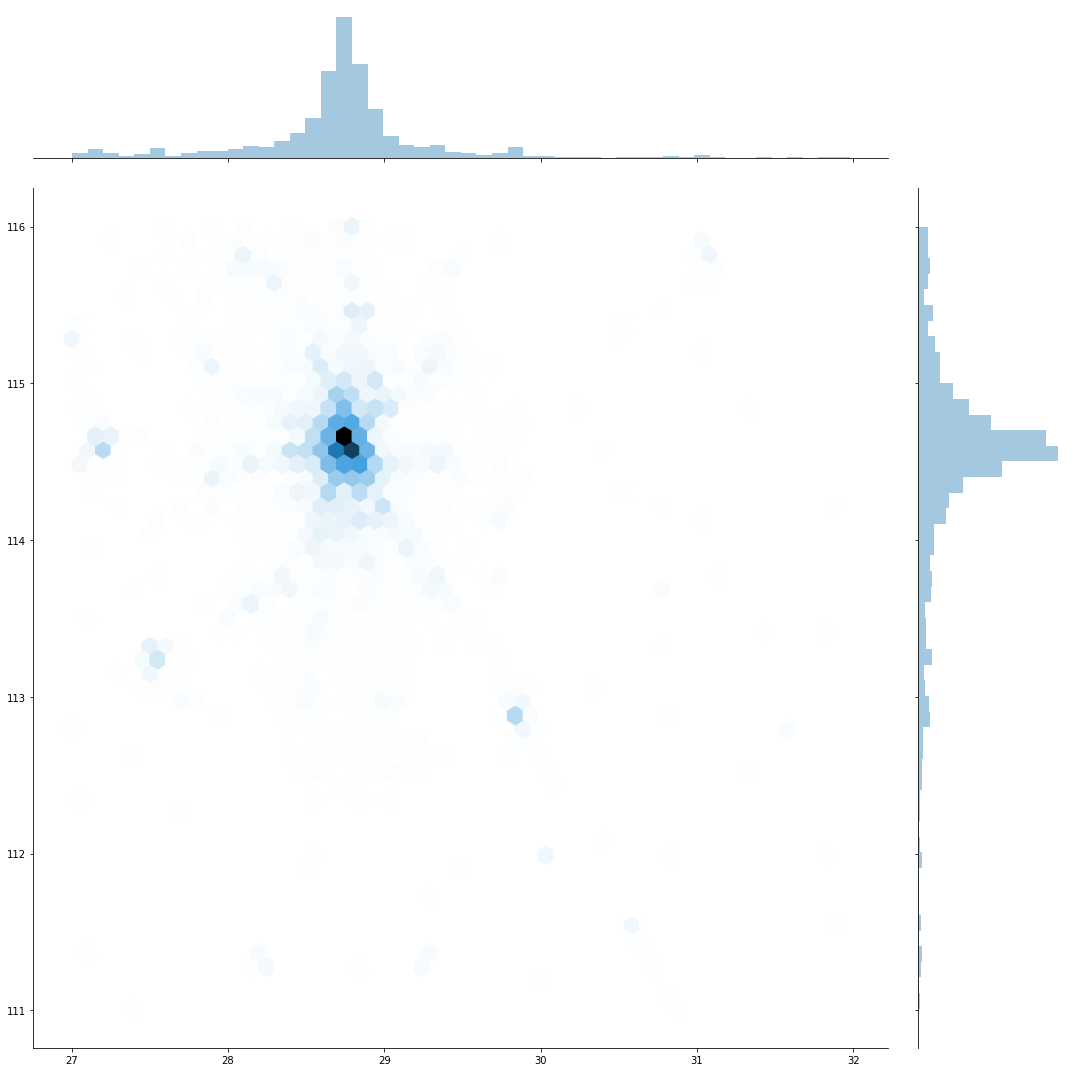

In [98]:
sns.jointplot(*stations.T, kind="hex", height=15)

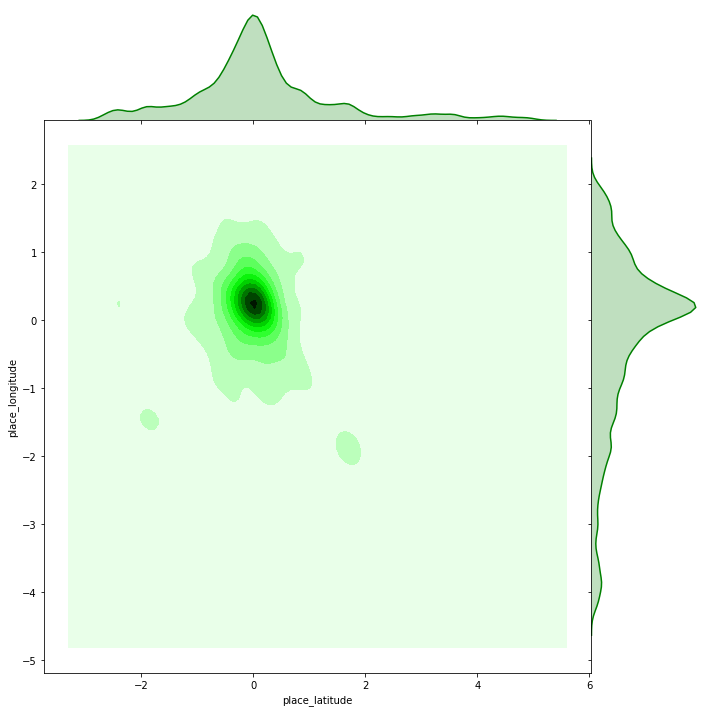

In [101]:
g = sns.jointplot('place_latitude','place_longitude', data=tdf, 
                  kind="kde", space=0, color="g", height=10)

In [38]:
stations = np.unique(df[['place_latitude', 'place_longitude']].values, axis=0)

In [48]:
km_models = []
for i in range(2,100):
    km = KMeans(n_clusters=i)
    km.fit(stations)
    if i%10==0:
        print(i, km.inertia_)
    km_models.append(km)

10 1285.8859006581379
20 560.4245223944362
30 371.55425298540246
40 263.6900970689543
50 205.98405417259647
60 169.51810867348536
70 142.83456325300025
80 123.37539219189566
90 107.8394790335051


In [49]:
aggclus_models = []
for i in range(2,100):
    aggc = AgglomerativeClustering(n_clusters=i)
    aggc.fit(stations)
    if i%10==0:
        print(i, aggc.n_leaves_)
    aggclus_models.append(aggc)

10 8312
20 8312
30 8312
40 8312
50 8312
60 8312
70 8312
80 8312
90 8312


In [50]:
df['time_start'].agg(['max','min'])

max    2020-01-31 21:03:03
min    2018-01-01 04:35:56
Name: time_start, dtype: object

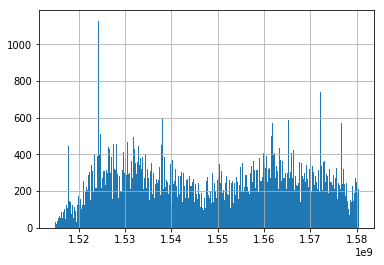

In [77]:
df['time_start'].map(lambda x: x.value/1e9).hist(bins=300)

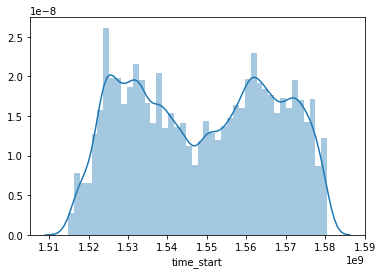

In [79]:
sns.distplot(df['time_start'].map(lambda x: x.value/1e9))